In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv("data/train.csv")
train.drop(columns=["Id", "parentspecies"], axis=1, inplace=True)

In [3]:
print(train.isna().sum())
no_missing_values = train.dropna(axis=0) #drop rows with missing values

MW                              0
NumOfAtoms                      0
NumOfC                          0
NumOfO                          0
NumOfN                          0
NumHBondDonors                  0
NumOfConf                       0
NumOfConfUsed                   0
C.C..non.aromatic.              0
C.C.C.O.in.non.aromatic.ring    0
hydroxyl..alkyl.                0
aldehyde                        0
ketone                          0
carboxylic.acid                 0
ester                           0
ether..alicyclic.               0
nitrate                         0
nitro                           0
aromatic.hydroxyl               0
carbonylperoxynitrate           0
peroxide                        0
hydroperoxide                   0
carbonylperoxyacid              0
nitroester                      0
pSat_Pa                         0
dtype: int64


<AxesSubplot:xlabel='pSat_Pa', ylabel='Count'>

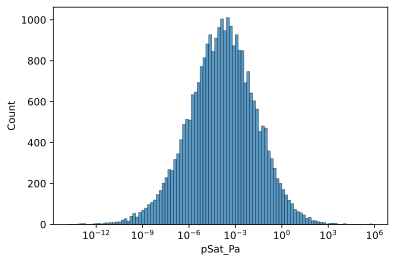

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_xscale("log")
sns.histplot(train, x="pSat_Pa", ax=ax1)

<AxesSubplot:xlabel='MW', ylabel='Count'>

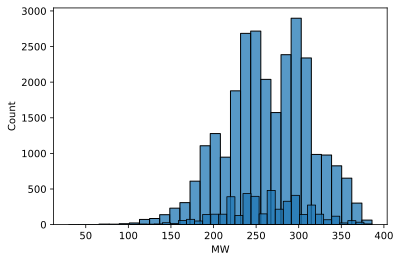

In [6]:
test = pd.read_csv("data/test.csv")
test.drop(columns=["Id", "parentspecies"], axis=1, inplace=True)

sns.histplot(train['MW'], bins=30)
sns.histplot(test['MW'], bins=30)

<AxesSubplot:xlabel='MW', ylabel='pSat_Pa'>

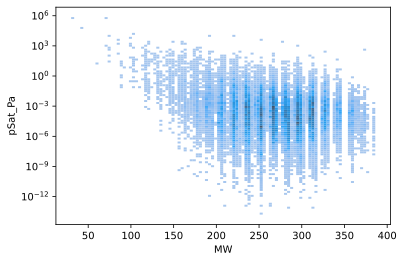

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_yscale("log")
sns.histplot(train, x="MW", y="pSat_Pa", bins=100, ax=ax1)

Text(0, 0.5, 'Importance')

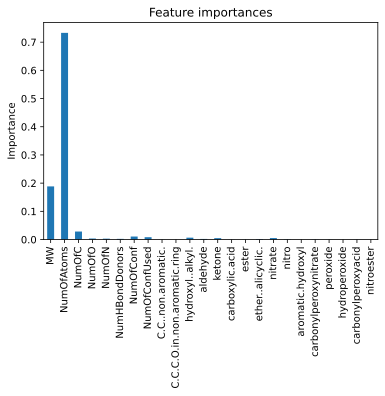

In [8]:
X_train = train.drop(columns=['pSat_Pa'])
y_train = train['pSat_Pa']

rfr = RandomForestRegressor(n_jobs = -1)
rfr.fit(X_train, y_train)
importances = rfr.feature_importances_
feature_names = X_train.columns

fig, ax = plt.subplots()
importances = pd.Series(rfr.feature_importances_, feature_names)
importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Importance")